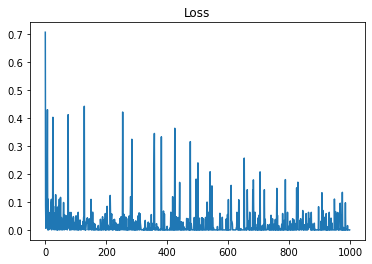


***Predictions Using Training Data
[3, 1.5, 1] predicted color: 0.6798403519490328 red
[2, 1, 0] predicted color: 0.0020447163600439194 blue
[4, 1.5, 1] predicted color: 0.9989021388738383 red
[3, 1, 0] predicted color: 0.4674972357831492 blue
[3.5, 0.5, 1] predicted color: 0.8825393341463245 red
[2, 0.5, 0] predicted color: 0.0008463910988882646 blue
[5.5, 1, 1] predicted color: 0.9999997002875994 red
[1, 1, 0] predicted color: 4.781726393355005e-06 blue

***Predictions Using Mystery Flower
[4.5, 1] predicted color: 0.9998715943115849 red


In [1]:
import matplotlib.pyplot as plt
import numpy as np

def visualizeData(data, mystery_flower):
    # EDA: Draw a scatter plot to visualize the data.
    for i in range(len(data)):
        point = data[i]
        color = 'r'
        if point[2] == 0:
            color = 'b'
        plt.scatter(point[0], point[1], c=color)

    plt.scatter(mystery_flower[0], mystery_flower[1], color='green')
    plt.title("Red, Blue and Mystery Flowers")
    plt.show()

# Compress linear equation result to a floating-point value between 0 and 1.
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def showLosses(losses):
    plt.plot(losses)
    plt.title("Loss")
    plt.show()

def getOptimalWeightsAndBias(data):
    # Initialize weights and bias.
    w1 = np.random.randn()
    w2 = np.random.randn()
    b  = np.random.randn()

    costs         = []
    learning_rate = 0.2

    for i in range(10000):
        # Get random element from data set.
        ri = np.random.randint(len(data))
        point = data[ri]

        # Regression line for flowers.
        z = w1*point[0] + w2*point[1] + b

        # Force prediction to a floating point value between a value of 0 and 1.
        pred   = sigmoid(z)
        target = point[2] # This is a 1 or 0.

        # This is the residual square which is the loss function.
        cost = (pred - target) ** 2

        # This is the derivative of the cost function with respect to the prediction.
        dcost_pred = 2 * (pred - target)

        # Change in cost with respect to the change in the target.
        dcost_dz = dcost_pred * pred

        # Change in cost with respect to change in weight 1.
        dcost_dw1 = dcost_dz * point[0]

        # Change in cost with respect to change in weight 2.
        dcost_dw2 = dcost_dz * point[1]

        # Update weights and bias.
        w1 = w1 - learning_rate * dcost_dw1
        w2 = w2 - learning_rate * dcost_dw2
        b  = b  - learning_rate * dcost_dz

        # Calculate cost every 10 iterations.
        if (i % 10 == 0):
            cost   = 0
            point  = data[ri]

            # Calculate cost for current prediction
            z      = point[0] * w1 + point[1] * w2 + b
            pred   = sigmoid(z)
            target = point[2]
            cost  += np.square(pred - target)
            costs.append(cost)
    showLosses(costs)
    return w1, w2, b

def showPredictions(data, title, w1, w2, b):
    print("\n***Predictions Using " + title)
    # Show predictions for each data point.
    for i in range(len(data)):
        point = data[i]
        z     = point[0] * w1 + point[1] * w2 + b
        pred  = sigmoid(z)

        color = 'blue'
        if(pred > 0.5):
            color = 'red'
        color = str(pred) + " " + color
        print(str(point) + " predicted color: " + color)

# Input data.
data = [
    [3, 1.5, 1],
    [2, 1, 0],
    [4, 1.5, 1],
    [3, 1, 0],
    [3.5, .5, 1],
    [2, .5, 0],
    [5.5, 1, 1],
    [1, 1, 0]]

# Unknown value.
mystery_flower = [4.5, 1]

w1, w2, b = getOptimalWeightsAndBias(data)
showPredictions(data, "Training Data", w1, w2, b)
showPredictions([mystery_flower], "Mystery Flower", w1, w2, b)

In [3]:
from tensorflow.keras        import Sequential
from tensorflow.keras.layers import Dense

import numpy  as np
import pandas as pd

# Load the flower feature data into a DataFrame.
df   = pd.DataFrame(columns=['Length', 'Width', 'IsRed'])
data = [
    {'Length':3,    'Width':1.5, 'IsRed': 1},
    {'Length':2,    'Width':1,   'IsRed': 0},
    {'Length':4,    'Width':1.5, 'IsRed': 1},
    {'Length':3,    'Width':1,   'IsRed': 0},
    {'Length':3.5,  'Width':.5,  'IsRed': 1},
    {'Length':2,    'Width':.5,  'IsRed': 0},
    {'Length':5.5,  'Width':1,   'IsRed': 1},
    {'Length':1,    'Width':1,   'IsRed': 0}]

for i in range(0, len(data)):
    df = df.append(data[i], ignore_index=True)
print(df)

ROW_DIM = 0
COL_DIM = 1

# Convert DataFrame columns to vertical columns of features (as mentioned earlier).
dfX = df.iloc[:, 0:2]
ROW_DIM = 0
COL_DIM = 1

x_array = dfX.values
x_arrayReshaped = x_array.reshape(x_array.shape[ROW_DIM],
                                  x_array.shape[COL_DIM])

# Convert DataFrame columns to vertical columns of target variables values.
dfY = df.iloc[:, 2:3]
y_array = dfY.values
y_arrayReshaped = y_array.reshape(y_array.shape[ROW_DIM],
                                  y_array.shape[COL_DIM])

# Build a network model of sequential layers.
model = Sequential()

# Add 1st hidden layer. Note 1st hidden layer also receives data from input layer.
# The input array must contain two feature columns and any number of rows.
model.add(Dense(10, activation='sigmoid',
                input_shape=(x_arrayReshaped.shape[COL_DIM],)))

# Add 2nd hidden layer.
# model.add(Dense(3, activation='sigmoid'))

# Add output layer.
model.add(Dense(1,  activation='sigmoid'))

# Compile the model.
# Binary cross entropy is used to measure error cost for binary predictions.
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
# An epoch is one iteration for all samples through the network.
# verbose can be set to 1 to show detailed output during training.
model.fit(x_arrayReshaped, y_arrayReshaped, epochs=1000, verbose=1)

# Evaluate the model
loss, acc = model.evaluate(x_arrayReshaped, y_arrayReshaped, verbose=0)
print('Test Accuracy: %.3f' % acc)

# Make a prediction
row = [4.5,1]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

   Length  Width  IsRed
0     3.0    1.5    1.0
1     2.0    1.0    0.0
2     4.0    1.5    1.0
3     3.0    1.0    0.0
4     3.5    0.5    1.0
5     2.0    0.5    0.0
6     5.5    1.0    1.0
7     1.0    1.0    0.0
Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 136ms/step - loss: 0.7963 - accuracy: 0.5000
Epoch 2/1000
1/1 [==============================] 

In [ ]:
import pandas                as     pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import LabelEncoder
from tensorflow.keras        import Sequential
from tensorflow.keras.layers import Dense

PATH       = "../datasets/"
df         = pd.read_csv(PATH + 'iris_old.csv')
df.columns = ['Sepal L', 'Sepal W', 'Petal L', 'Petal W', 'Iris Type']
print(df)

# Convert text to numeric category.
# 0 is setosa, 1 is versacolor and 2 is virginica
df['y'] = LabelEncoder().fit_transform(df['Iris Type'])

# Prepare the data.
dfX = df.iloc[:, 0:4] # Get X features only from columns 0 to 3
dfY = df.iloc[:, 5:6] # Get X features only from column 5

x_array = dfX.values
x_arrayReshaped = x_array.reshape(x_array.shape[0], x_array.shape[1])

y_array = dfY.values
y_arrayReshaped = y_array.reshape(y_array.shape[0], y_array.shape[1])

# Split into train and test data sets.
X_train, X_test, y_train, y_test = train_test_split(
    x_arrayReshaped, y_arrayReshaped, test_size=0.33)

model = Sequential()

# Sigmoid first hidden layer with 12 neurons
model.add(Dense(12, activation='sigmoid', input_shape=(x_arrayReshaped.shape[1],)))
# Softmax output layer with 3 neurons
# Softmax activation is used to allow multi-class output
model.add(Dense(3, activation='softmax'))
# Compile the model
# Sparse categorical crossentropy function is used to calculate the non-binary classification predictions
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model
# An epoch is one iteration for all samples through the network.
# verbose can be set to 1 to show detailed output during training.
model.fit(x_arrayReshaped, y_arrayReshaped, epochs=1000, verbose=1)

# Evaluate the model
loss, acc = model.evaluate(x_arrayReshaped, y_arrayReshaped, verbose=0)
print('Test Accuracy: %.3f' % acc)

# Make a prediction
row = [5.1, 3.5, 1.4, 0.2]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)

     Sepal L  Sepal W  Petal L  Petal W       Iris Type
0        4.9      3.0      1.4      0.2     Iris-setosa
1        4.7      3.2      1.3      0.2     Iris-setosa
2        4.6      3.1      1.5      0.2     Iris-setosa
3        5.0      3.6      1.4      0.2     Iris-setosa
4        5.4      3.9      1.7      0.4     Iris-setosa
..       ...      ...      ...      ...             ...
144      6.7      3.0      5.2      2.3  Iris-virginica
145      6.3      2.5      5.0      1.9  Iris-virginica
146      6.5      3.0      5.2      2.0  Iris-virginica
147      6.2      3.4      5.4      2.3  Iris-virginica
148      5.9      3.0      5.1      1.8  Iris-virginica

[149 rows x 5 columns]
Epoch 1/1000
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: unsupported operand type(s) for -: 'NoneType' and 'int'
To silence this warning, decorate the function with @tf.autograph.ex

2022-01-19 21:01:31.047762: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-01-19 21:01:31.049476: W tensorflow/core/platform/profile_utils/cpu_utils.cc:126] Failed to get CPU frequency: 0 Hz


5/5 [==============================] - 0s 577us/step - loss: 1.3100 - accuracy: 0.3254
Epoch 2/1000
5/5 [==============================] - 0s 749us/step - loss: 1.2687 - accuracy: 0.3106
Epoch 3/1000
5/5 [==============================] - 0s 823us/step - loss: 1.2185 - accuracy: 0.3085
Epoch 4/1000
5/5 [==============================] - 0s 705us/step - loss: 1.1596 - accuracy: 0.3519
Epoch 5/1000
5/5 [==============================] - 0s 493us/step - loss: 1.1670 - accuracy: 0.3271
Epoch 6/1000
5/5 [==============================] - 0s 411us/step - loss: 1.1304 - accuracy: 0.3415
Epoch 7/1000
5/5 [==============================] - 0s 407us/step - loss: 1.1236 - accuracy: 0.3484
Epoch 8/1000
5/5 [==============================] - 0s 464us/step - loss: 1.1261 - accuracy: 0.3111
Epoch 9/1000
5/5 [==============================] - 0s 582us/step - loss: 1.0783 - accuracy: 0.3575
Epoch 10/1000
5/5 [==============================] - 0s 527us/step - loss: 1.0947 - accuracy: 0.3015
Epoch 11/100